# CMPS 320
## Lab 3:  Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import statsmodels.formula.api as smf     


# plot the graph directly in the notebook
%matplotlib inline

In this Lab, we will be using an Advertising data set. The data set consists of the sales of products in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

### Step 1: Acquire Data and Data Preparation

In [2]:
advertising = pd.read_csv('Advertising.csv', usecols=[1,2,3,4]) # load data  
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
advertising.head()    # advertising.tail() 

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advertising.describe() # Check summary statistics

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
advertising.shape # Check data dimension

(200, 4)

### Step 2: Some Exploration Data Analysis (EDA)

It is a good practise to examine the characteristics of the data before modeling.

C:\Users\Badle\MLClass\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


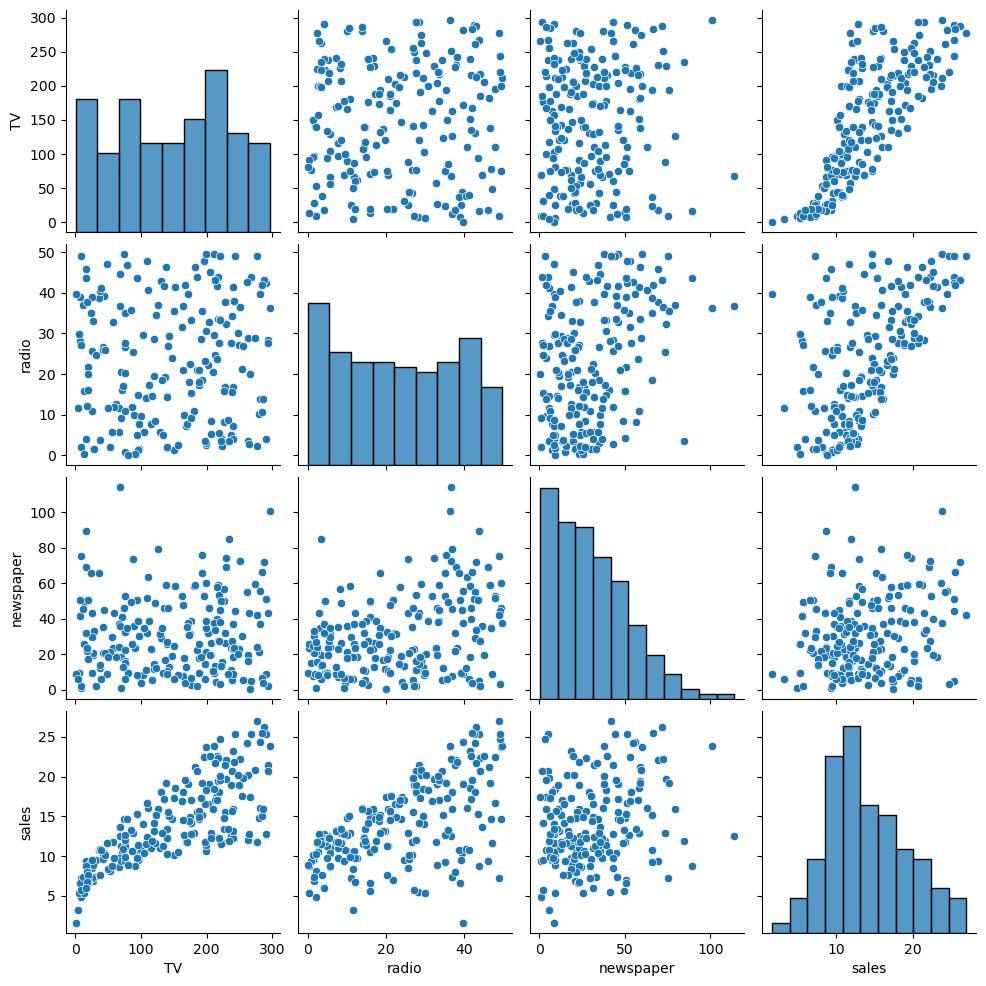

In [6]:
# View the scatter plot of features using the seaborne package

sn.pairplot(advertising)

C:\Users\Badle\MLClass\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


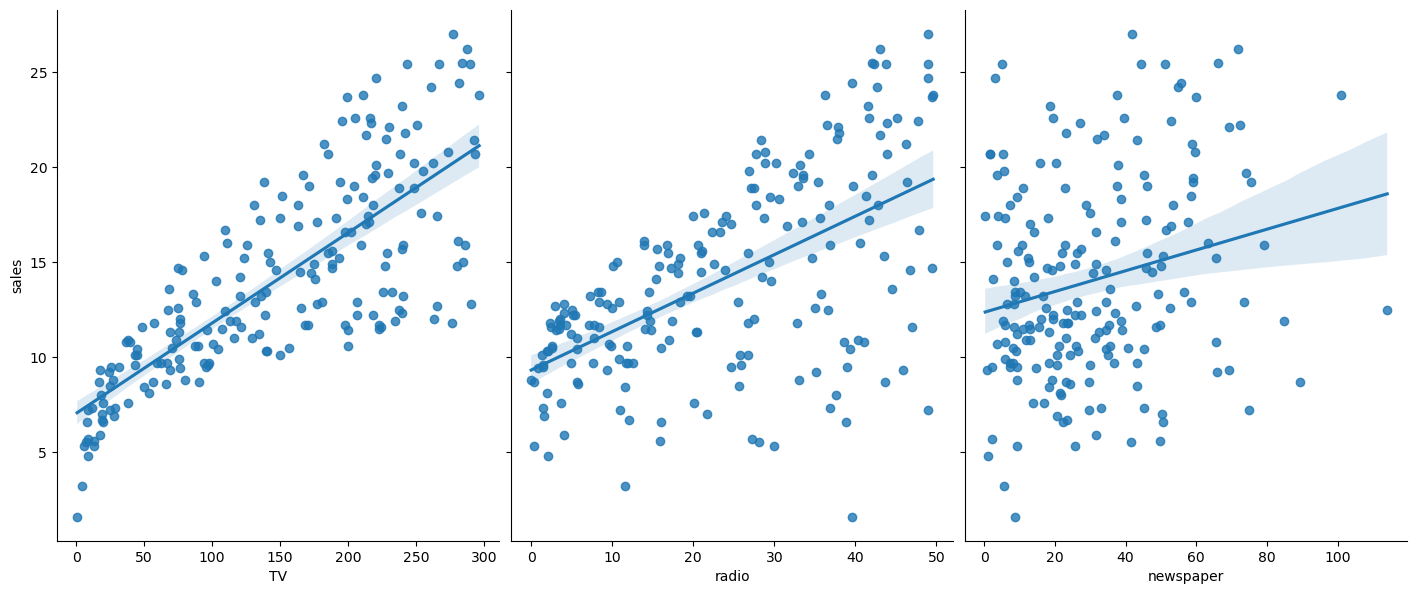

In [7]:
# Represent only the relationship between 'Sales' and features as a scatterplot,
# Display the regression line and 95% confidence band as in R's ggplot ('kind='reg').

sn.pairplot(data = advertising, x_vars=['TV', 'radio', 'newspaper'], y_vars=['sales'], height=6, aspect=0.8, kind='reg')

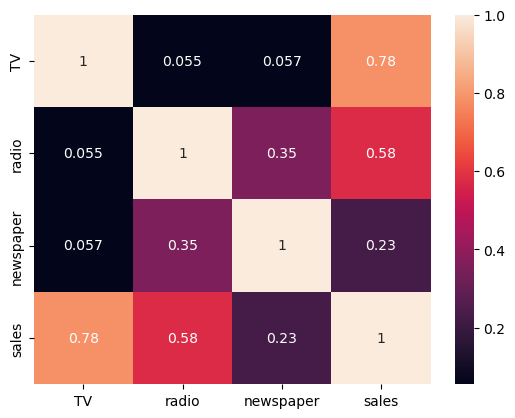

In [8]:
# CORRELATION MATRIX
corrMatrix = advertising.corr() 
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Step 3: Fitting a Simple Linear Regression model with statsmodels

In [9]:
#1. Model import: The module containing the model has already been imported.

# 2. Model Instantiation: Creating a linear regression model using Ordinary Least Squares (ols)

lm = smf.ols(formula='sales ~ TV', data=advertising)

# 'sales' column as response and 'TV' column as feature in 'advertising' DataFrame
# define a linear regression model

# 3. Train the model, and receive the result (learned) model as 'lm_learned'
lm_learned = lm.fit()

# coefficients of the trained model

lm_learned.params

# Note Type lm_learned._Tab_ to see what methods are available 
#for the 'lm_learned' object.
# lm_learned.pvalues            # p values
# lm_learned.rsquared           # R-squared statistic 

Intercept    7.032594
TV           0.047537
dtype: float64

In [10]:
# Usually, the above steps 2 & 3 are chained.
lm = smf.ols(formula='sales ~ TV', data=advertising).fit()

# The trained model (i.e. fit model) is created

In [11]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.47e-42
Time:                        10:28:28   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

#### Interpretation of Model Coefficients $\beta_0$ and $\beta_1$


$$y = \beta_0 + \beta_1x = 7.032 + 0.0475 \times TV$$

$\beta_1 = 0.0475$ : An additional $1000 spent on TV advertising is associated with
selling approximately 47.5 additional units of the product.

#### Confidence Interval of the Model Coefficients

In [12]:
lm.conf_int(0.05)   # 99% confidence interval

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


##### Interpretation of Confidence Interval of Model Coefficients $\beta_0$ and $\beta_1$

The 95% confidence interval for $\beta_0$ is [6.130, 7.935] and the 95% confidence interval for $\beta_1$ is [0.042, 0.053].

Therefore, we can conclude that in the absence of any advertising, sales will, on average, fall somewhere between 6,130 and 7,935 units. 

Furthermore, for each $1,000 increase in television advertising, there will be an average increase in sales of between 42 and 53 units.

#### Visualizing the relationship between response and feature.

We draw a scatter plot with Sales on the Y-axis and TV ad spending on the X-axis.

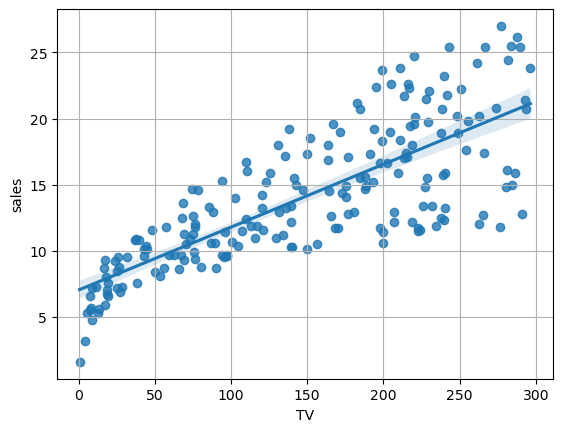

In [13]:
# Using the seaborn package

sn.regplot( x= advertising.TV, y= advertising.sales)
plt.grid()

***Utilizing a Learned Model***: Prediction and Related Issues

The model lm created above was created using only the TV variable of Advertising as a feature.
The above R-squared value of 0.612 or Residual is the training performance obtained using the data (training set) used to create the model.

The goal of predictive analysis is not to create a model that performs well on the training set, but rather to create a model that is likely to perform well on the first (future) out-of-sample data (i.e., by generalizing well)

Prediction: When giving a new predictor value (TV) using the created model (lm), what is the prediction of 'Sales'?
For example, predict Sales when TV = 100

In [14]:
# The statsmodel formula interface should provide input as an array data structure such as a pandas DataFrame
x_new = pd.DataFrame({'TV': [100]}) # Generic way to create a df from a dictionary
# x_new.info()
x_new.head()

,TV
0,100


Prediction: Using the 'predict' method as shown below
** The input of predict() must have features used for training in the form of an array like DataFrame**

In [15]:
lm.predict(x_new) # return the resulting prediction as an ndarray in numpy"

0    11.786258
dtype: float64

In [16]:
X_new = pd.DataFrame({'TV': [100, 422, 74]}) # Sales forecast when TV is 100, 422, or 74?
lm.predict(X_new)

0    11.786258
1    27.093056
2    10.550305
dtype: float64

### Fitting a Multiple Linear Regression model

**multiple linear regression**: Estimate response using multiple features

$Y = \beta_0 + \beta_1X_1 + ... + \beta_nX_n$

Multiple linear regression with Advertising TV, Radio, and Newspapers as a feature and Sales as the response:

$Sales = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

In [17]:
lm_mul = smf.ols(formula='sales ~ TV + radio + newspaper', data=advertising).fit()
print(lm_mul.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        10:28:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

***Interpretation of results***

Since the p-value of the F statistic is very small (1.58e-96), the model is valid (at least one variable is related to the response)

The p-values of TV and Radio are meaningful. However, since the p-value of the Newspaper reaches 0.86, the null-hypothesis that "Newspaper is not related to the response" cannot be rejected. Therefore, it is not suitable to include the Newspaper variable in the model.

R-squared increased to 0.89 compared to simple linear regression (0.612). It can be thought that this model at least explains (predicts) the response of the training set better than simple linear regression.

#### Alternative Technique

##### Fitting the linear model

In [18]:
x = advertising.drop(["sales"],axis=1)
y = advertising.sales

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.30)

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)

In [22]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))# R squared

R squared: 0.8972106381789522


### Checking Model Assumptions

#### Check for Linearity

C:\Users\Badle\MLClass\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


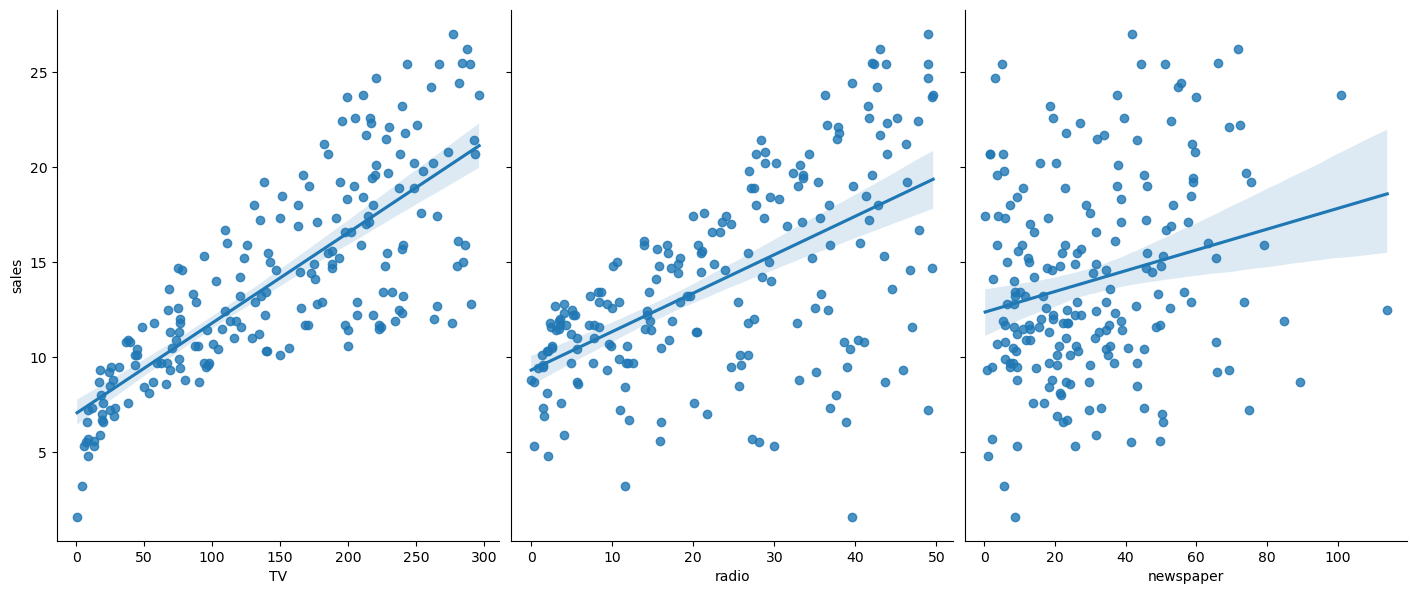

In [23]:
sn.pairplot(data = advertising, x_vars=['TV', 'radio', 'newspaper'], y_vars=['sales'],height=6, aspect=0.8, kind='reg')

#### Mean of Residuals

Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero.

In [24]:
residuals = y.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.0658141036401502e-16


#### Check for Constant Variance (Homoscedasticity)

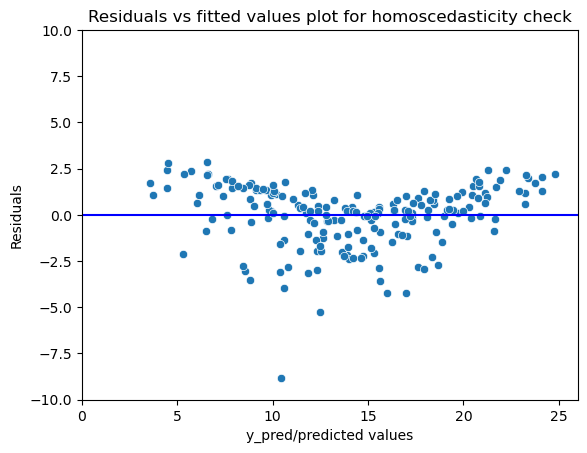

In [25]:
p = sn.scatterplot(x = y_pred,y = residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sn.lineplot(x= [0,26],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Detecting heteroscedasticity:

- Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( $\hat{Y_i}$). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

- Using Goldfeld Quandt Test: 

In [26]:
# Using Goldfeld Quandt Test

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', 1.3437995226729402), ('p-value', 0.07369564428747298)]

Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic. Good.

#### Check for Normality of error terms/residuals

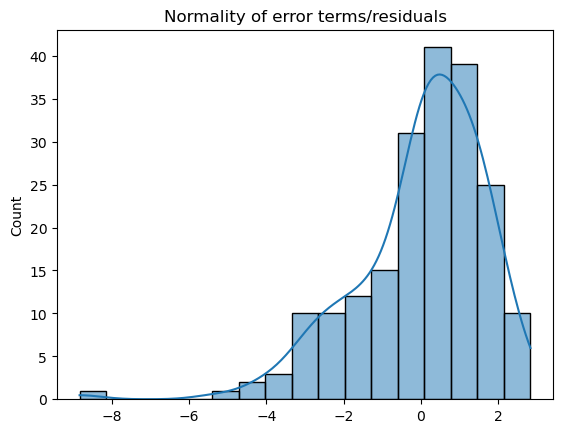

In [27]:
p = sn.histplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The residual terms are pretty much normally distributed.

#### Check for multicollinearity

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = advertising.drop(["sales"],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

     feature       VIF
0         TV  2.486772
1      radio  3.285462
2  newspaper  3.055245


VIF value that exceeds 5  indicates a problematic amount of collinearity, hence there is no evidence of multicollinearity in our dataset.